Group Members:
Matthew Rumrill, Thierno-Oumar Diallo, Yekaalo Gebremeskel, Fitz-Earl McKenzie II, Reem Alyami


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Manipulation and Final Dataframe

In [ ]:
data_crsp = pd.read_csv('/content/drive/Shareddrives/Group Project 736/crsp.csv')
init_df = pd.read_excel('/content/drive/Shareddrives/Group Project 736/factors_f2.xlsx')

In [ ]:
df1 = data_crsp.copy()

In [ ]:
df1['date'] = pd.to_datetime(df1['datadate'].astype(str), format='%Y%m%d')
df1['year'] = df1['date'].dt.strftime('%Y')
df1['month'] = df1['date'].dt.strftime('%m')
df1['year'] = df1['year'].astype('int')
df1['month'] = df1['month'].astype('int')

df1['sic'] = df1['sic'].astype('str')
df1['ind'] = df1['sic'].str[:2]

df1 = df1.drop(['datadate', 'sic'], axis=1)

In [ ]:
df2 = df1.groupby(['GVKEY','LPERMNO', 'cusip','ind','year']).agg({'cshtrm': 'mean'})
df2 = df2.sort_values(by=['year']).reset_index()

df3 = df1.groupby(['GVKEY','LPERMNO', 'cusip','ind','year']).agg({'prccm': 'mean'})
df3 = df3.sort_values(by=['year']).reset_index()

df4 = df1.groupby(['GVKEY','LPERMNO', 'cusip','ind','year']).agg({'trt1m': 'mean'})
df4 = df4.sort_values(by=['year']).reset_index()

df5 = df1.groupby(['GVKEY','LPERMNO', 'cusip','ind','year']).agg({'cshoq': 'mean'})
df5 = df5.sort_values(by=['year']).reset_index()

In [ ]:
from functools import reduce
#define list of DataFrames
dfs = [df2, df3, df4, df5]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['GVKEY','LPERMNO', 'cusip','ind','year'],
                                            how='outer'), dfs)

final_df = final_df.rename(columns={"cshtrm":"size", "cshoq": "shares", "trt1m": "yret", "prccm": "price"})

In [ ]:
init_df = init_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
q_df = pd.merge(final_df, init_df, left_on = ['LPERMNO', 'year'], right_on =['permno', 'year'] )
#q_df = q_df.drop(['YEAR', 'PERMNO'], axis=1)
q_df.head()

,GVKEY,LPERMNO,cusip,ind,year,size,price,yret,shares,permno,...,lev,noa,ns,ok,os,roa,roe,sg,_rmse_,sue
0,10453,51369,880770102,38,1980,373257.142857,45.714286,5.433386,4.044333,51369,...,0.292309,1.187677,0.185190,1.682836,-6.892411,0.105151,0.126805,1.390140,NaN,1.411185
1,7982,58246,665859104,60,1980,64342.857143,34.535714,0.817843,4.800000,58246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.344878,NaN,0.006097
2,7985,24766,666807102,38,1980,649285.714286,49.375000,5.563743,14.262667,24766,...,0.975111,0.322600,0.000281,1.555121,-8.747807,0.097000,0.403775,0.886114,0.017413,-0.172418
3,7988,58289,667188106,70,1980,16085.714286,14.071429,7.499571,NaN,58289,...,3.482848,0.891866,0.016394,NaN,NaN,0.065482,0.210094,NaN,NaN,NaN
4,7990,58659,667446108,49,1980,804185.714286,32.107143,7.877786,14.177667,58659,...,1.860397,0.776837,0.198207,NaN,-6.619392,0.056355,0.163453,1.369743,NaN,-0.444802


In [ ]:
q_df.shape

(193626, 32)

In [ ]:
q_df.isnull().sum(axis = 0)

GVKEY            0
LPERMNO          0
cusip            0
ind              0
year             0
size           323
price           40
yret            73
shares       14726
permno           0
ac           59688
ag           38695
ci_x         79749
beta_sum    135911
bm           46450
ci_y        124923
cp           92619
dp          142601
ep           92167
ia           55339
ig           66582
ik           42325
lev          40416
noa          53522
ns           67115
ok           58656
os           59865
roa          53168
roe          95777
sg           31691
_rmse_      127795
sue          46060
dtype: int64

In [ ]:
q_df.groupby('year')['LPERMNO'].nunique()

year
1980    3910
1981    4159
1982    4423
1983    4627
1984    5037
1985    5186
1986    5273
1987    5371
1988    5451
1989    5165
1990    5045
1991    4957
1992    5084
1993    5240
1994    5725
1995    6479
1996    6790
1997    7556
1998    7372
1999    7072
2000    6789
2001    6250
2002    5600
2003    5181
2004    4997
2005    4906
2006    4819
2007    4764
2008    4542
2009    4307
2010    4160
2011    4006
2012    3870
2013    3821
2014    3881
2015    3913
2016    3839
2017    3786
Name: LPERMNO, dtype: int64

# Merge Student Factors

## Short Factor

In [ ]:
short = pd.read_csv('/content/drive/Shareddrives/Group Project 736/Finalized/short_annual.csv')

In [ ]:
short.shape

(184686, 4)

In [ ]:
short.head()

,Unnamed: 0,gvkey,YEAR,shortintadj
0,0,1004,1980,39077.859375
1,1,1004,1981,41681.250000
2,2,1004,1983,14725.125000
3,3,1004,1984,23965.312500
4,4,1004,1985,28261.406250


## Spread Factor

In [ ]:
'''spread = pd.read_csv('/content/drive/Shareddrives/Group Project 736/Finalized/spread_annual.csv')'''

"spread = pd.read_csv('/content/drive/Shareddrives/Group Project 736/Finalized/spread_annual.csv')"

In [ ]:
'''spread.head()'''

'spread.head()'

## Adv Factor

In [ ]:
adv = pd.read_csv('/content/drive/Shareddrives/Group Project 736/Finalized/adv_monthly.csv')
data1 = adv.copy()

data1['date'] = pd.to_datetime(data1['public_date'].astype(str), format='%d/%m/%Y')
data1['year'] = data1['date'].dt.strftime('%Y')
data1['month'] = data1['date'].dt.strftime('%m')
data1['year'] = data1['year'].astype('int')
data1['month'] = data1['month'].astype('int')

data2 = data1.groupby(['permno', 'year']).agg({'adv_sale': 'mean'})
data2 = data2.sort_values(by=['year']).reset_index()
data2.head()
adv = data2

adv.shape

(207314, 3)

In [ ]:
adv.head()

,permno,year,adv_sale
0,13980,1980,0.000000
1,50809,1980,0.000000
2,70288,1980,0.001750
3,24248,1980,0.000000
4,66747,1980,0.032667


## RD_Sales Factor

In [ ]:
 sale_invcap = pd.read_csv('/content/drive/Shareddrives/Group Project 736/Finalized/sale_invcap.csv')

In [ ]:
sale_invcap.head()

,permno,adate,qdate,public_date,sale_invcap
0,10015,NaN,30/09/1983,30/11/1983,NaN
1,10015,NaN,30/09/1983,31/12/1983,NaN
2,10015,NaN,30/09/1983,31/01/1984,NaN
3,10015,31/12/1983,31/12/1983,29/02/1984,2.087
4,10015,31/12/1983,31/12/1983,31/03/1984,2.087


In [ ]:
data1 = sale_invcap.copy()

data1['date'] = pd.to_datetime(data1['public_date'].astype(str), format='%d/%m/%Y')
data1['year'] = data1['date'].dt.strftime('%Y')
data1['month'] = data1['date'].dt.strftime('%m')
data1['year'] = data1['year'].astype('int')
data1['month'] = data1['month'].astype('int')

data2 = data1.groupby(['permno', 'year']).agg({'sale_invcap': 'mean'})
data2 = data2.sort_values(by=['year']).reset_index()
data2.head()
sale_invcap = data2

sale_invcap.shape

(91804, 3)

In [ ]:
data1.head()

,permno,adate,qdate,public_date,sale_invcap,date,year,month
0,10015,NaN,30/09/1983,30/11/1983,NaN,1983-11-30,1983,11
1,10015,NaN,30/09/1983,31/12/1983,NaN,1983-12-31,1983,12
2,10015,NaN,30/09/1983,31/01/1984,NaN,1984-01-31,1984,1
3,10015,31/12/1983,31/12/1983,29/02/1984,2.087,1984-02-29,1984,2
4,10015,31/12/1983,31/12/1983,31/03/1984,2.087,1984-03-31,1984,3


## Recommendation Factor (Do not run)

In [ ]:
#data = pd.read_csv('/content/drive/Shareddrives/Group Project 736/recc.csv')

In [ ]:
#data1 = data.copy()
#data1.head()

In [ ]:
'''data1['date'] = pd.to_datetime(data1['STATPERS'].astype(str), format='%Y%m%d')
data1['year'] = data1['date'].dt.strftime('%Y')
data1['month'] = data1['date'].dt.strftime('%m')
data1['year'] = data1['year'].astype('int')
data1['month'] = data1['month'].astype('int')'''

"data1['date'] = pd.to_datetime(data1['STATPERS'].astype(str), format='%Y%m%d')\ndata1['year'] = data1['date'].dt.strftime('%Y')\ndata1['month'] = data1['date'].dt.strftime('%m')\ndata1['year'] = data1['year'].astype('int')\ndata1['month'] = data1['month'].astype('int')"

In [ ]:
'''data2 = data1.groupby(['CUSIP', 'year']).agg({'BUYPCT': 'mean'})
data2 = data2.sort_values(by=['year']).reset_index()

data3 = data1.groupby(['CUSIP', 'year']).agg({'SELLPCT': 'mean'})
data3 = data3.sort_values(by=['year']).reset_index()

data4 = data1.groupby(['CUSIP', 'year']).agg({'HOLDPCT': 'mean'})
data4 = data4.sort_values(by=['year']).reset_index()'''

"data2 = data1.groupby(['CUSIP', 'year']).agg({'BUYPCT': 'mean'})\ndata2 = data2.sort_values(by=['year']).reset_index()\n\ndata3 = data1.groupby(['CUSIP', 'year']).agg({'SELLPCT': 'mean'})\ndata3 = data3.sort_values(by=['year']).reset_index()\n\ndata4 = data1.groupby(['CUSIP', 'year']).agg({'HOLDPCT': 'mean'})\ndata4 = data4.sort_values(by=['year']).reset_index()"

In [ ]:
#df_final = pd.merge(pd.merge(data2,data3,on=['CUSIP', 'year']),data4,on=['CUSIP', 'year'])

In [ ]:
#df_final['BUYPCT'] = (df_final['BUYPCT'] / 100).round(2)
#df_final['SELLPCT'] = (df_final['SELLPCT'] / 100).round(2)
#df_final['HOLDPCT'] = (df_final['HOLDPCT'] / 100).round(2)

In [ ]:
#df_final.head()

In [ ]:
#df_new['CUSIP'] = df_new['cusip'].astype(str).str[:-1]
#dff = pd.merge(df_new, df_final, left_on = ['CUSIP', 'year'], right_on =['CUSIP', 'year'] )
#dff.head()

## Final Dataframe Merge with Student factors

In [ ]:
q_df.head()

,GVKEY,LPERMNO,cusip,ind,year,size,price,yret,shares,permno,...,lev,noa,ns,ok,os,roa,roe,sg,_rmse_,sue
0,10453,51369,880770102,38,1980,373257.142857,45.714286,5.433386,4.044333,51369,...,0.292309,1.187677,0.185190,1.682836,-6.892411,0.105151,0.126805,1.390140,NaN,1.411185
1,7982,58246,665859104,60,1980,64342.857143,34.535714,0.817843,4.800000,58246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.344878,NaN,0.006097
2,7985,24766,666807102,38,1980,649285.714286,49.375000,5.563743,14.262667,24766,...,0.975111,0.322600,0.000281,1.555121,-8.747807,0.097000,0.403775,0.886114,0.017413,-0.172418
3,7988,58289,667188106,70,1980,16085.714286,14.071429,7.499571,NaN,58289,...,3.482848,0.891866,0.016394,NaN,NaN,0.065482,0.210094,NaN,NaN,NaN
4,7990,58659,667446108,49,1980,804185.714286,32.107143,7.877786,14.177667,58659,...,1.860397,0.776837,0.198207,NaN,-6.619392,0.056355,0.163453,1.369743,NaN,-0.444802


In [ ]:
q_df.shape

(193626, 32)

In [ ]:
# Merge Adv Factor
final = pd.merge(q_df, adv, left_on = ['permno', 'year'], right_on =['permno', 'year'] )
final.head()

,GVKEY,LPERMNO,cusip,ind,year,size,price,yret,shares,permno,...,noa,ns,ok,os,roa,roe,sg,_rmse_,sue,adv_sale
0,10453,51369,880770102,38,1980,373257.142857,45.714286,5.433386,4.044333,51369,...,1.187677,0.185190,1.682836,-6.892411,0.105151,0.126805,1.390140,NaN,1.411185,0.0000
1,7982,58246,665859104,60,1980,64342.857143,34.535714,0.817843,4.800000,58246,...,NaN,NaN,NaN,NaN,NaN,NaN,1.344878,NaN,0.006097,0.0000
2,7985,24766,666807102,38,1980,649285.714286,49.375000,5.563743,14.262667,24766,...,0.322600,0.000281,1.555121,-8.747807,0.097000,0.403775,0.886114,0.017413,-0.172418,0.0000
3,7988,58289,667188106,70,1980,16085.714286,14.071429,7.499571,NaN,58289,...,0.891866,0.016394,NaN,NaN,0.065482,0.210094,NaN,NaN,NaN,0.0315
4,7990,58659,667446108,49,1980,804185.714286,32.107143,7.877786,14.177667,58659,...,0.776837,0.198207,NaN,-6.619392,0.056355,0.163453,1.369743,NaN,-0.444802,0.0000


In [ ]:
final.shape

(190570, 33)

In [ ]:
# Merge Short Factor
final = pd.merge(final, short, left_on = ['GVKEY', 'year'], right_on =['gvkey', 'YEAR'] )
final.head()

,GVKEY,LPERMNO,cusip,ind,year,size,price,yret,shares,permno,...,roa,roe,sg,_rmse_,sue,adv_sale,Unnamed: 0,gvkey,YEAR,shortintadj
0,10453,51369,880770102,38,1980,373257.142857,45.714286,5.433386,4.044333,51369,...,0.105151,0.126805,1.390140,NaN,1.411185,0.00,47662,10453,1980,544304.00000
1,7985,24766,666807102,38,1980,649285.714286,49.375000,5.563743,14.262667,24766,...,0.097000,0.403775,0.886114,0.017413,-0.172418,0.00,35351,7985,1980,51514.50000
2,7990,58659,667446108,49,1980,804185.714286,32.107143,7.877786,14.177667,58659,...,0.056355,0.163453,1.369743,NaN,-0.444802,0.00,35390,7990,1980,12613.25000
3,1968,53110,056525108,38,1980,20285.714286,10.321429,0.154657,1.412333,53110,...,0.075938,0.131695,1.002692,NaN,-1.977941,0.01,4810,1968,1980,16672.00000
4,1967,54893,056357106,62,1980,939257.142857,16.892857,14.687357,9.768500,54893,...,NaN,NaN,1.423406,NaN,0.869803,0.00,4808,1967,1980,27729.88575


In [ ]:
#Merge Spread Factor
#final = pd.merge(final, spread, left_on = ['LPERMNO', 'year'], right_on =['PERMNO', 'YEAR'] )
#final.head()

In [ ]:
final.shape

(106452, 37)

In [ ]:
final.columns

Index(['GVKEY', 'LPERMNO', 'cusip', 'ind', 'year', 'size', 'price', 'yret',
       'shares', 'permno', 'ac', 'ag', 'ci_x', 'beta_sum', 'bm', 'ci_y', 'cp',
       'dp', 'ep', 'ia', 'ig', 'ik', 'lev', 'noa', 'ns', 'ok', 'os', 'roa',
       'roe', 'sg', '_rmse_', 'sue', 'adv_sale', 'Unnamed: 0', 'gvkey', 'YEAR',
       'shortintadj'],
      dtype='object')

In [ ]:
#Merge Thierno Rd_Sales Factor
final = pd.merge(final, sale_invcap, left_on = ['permno', 'year'], right_on =['permno', 'year'] )
final.head()

,GVKEY,LPERMNO,cusip,ind,year,size,price,yret,shares,permno,...,roe,sg,_rmse_,sue,adv_sale,Unnamed: 0,gvkey,YEAR,shortintadj,sale_invcap
0,10453,51369,880770102,38,1980,373257.142857,45.714286,5.433386,4.044333,51369,...,0.126805,1.390140,NaN,1.411185,0.00,47662,10453,1980,544304.00000,1.695333
1,7985,24766,666807102,38,1980,649285.714286,49.375000,5.563743,14.262667,24766,...,0.403775,0.886114,0.017413,-0.172418,0.00,35351,7985,1980,51514.50000,3.538917
2,7990,58659,667446108,49,1980,804185.714286,32.107143,7.877786,14.177667,58659,...,0.163453,1.369743,NaN,-0.444802,0.00,35390,7990,1980,12613.25000,2.226583
3,1968,53110,056525108,38,1980,20285.714286,10.321429,0.154657,1.412333,53110,...,0.131695,1.002692,NaN,-1.977941,0.01,4810,1968,1980,16672.00000,1.979583
4,1967,54893,056357106,62,1980,939257.142857,16.892857,14.687357,9.768500,54893,...,NaN,1.423406,NaN,0.869803,0.00,4808,1967,1980,27729.88575,2.883500


In [ ]:
final.shape

(47667, 38)

In [ ]:
final.isnull().sum(axis = 0)

GVKEY              0
LPERMNO            0
cusip              0
ind                0
year               0
size               2
price              0
yret               7
shares          2882
permno             0
ac              8803
ag              6048
ci_x            8215
beta_sum       24143
bm              7318
ci_y           29256
cp             13551
dp             20204
ep             13421
ia              7090
ig              7491
ik              6616
lev             6209
noa             6573
ns              9955
ok             10936
os              7739
roa             6524
roe            14557
sg              1579
_rmse_         27466
sue             2204
adv_sale         189
Unnamed: 0         0
gvkey              0
YEAR               0
shortintadj        0
sale_invcap      241
dtype: int64

<Axes: >

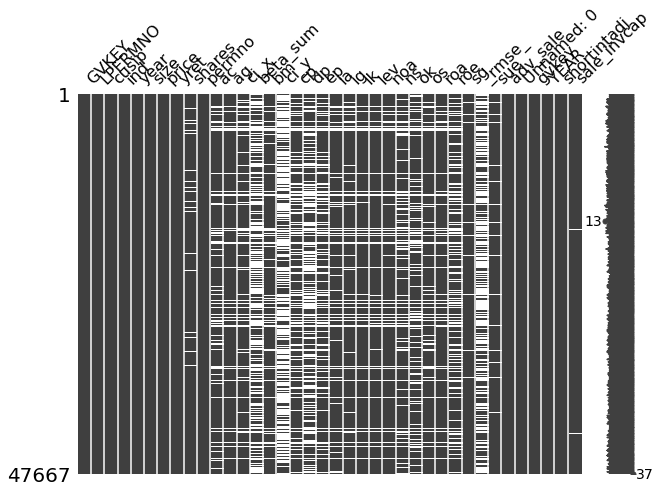

In [ ]:
import missingno as msno
msno.matrix(final, figsize=(10,7))

In [ ]:
final.columns

Index(['GVKEY', 'LPERMNO', 'cusip', 'ind', 'year', 'size', 'price', 'yret',
       'shares', 'permno', 'ac', 'ag', 'ci_x', 'beta_sum', 'bm', 'ci_y', 'cp',
       'dp', 'ep', 'ia', 'ig', 'ik', 'lev', 'noa', 'ns', 'ok', 'os', 'roa',
       'roe', 'sg', '_rmse_', 'sue', 'adv_sale', 'Unnamed: 0', 'gvkey', 'YEAR',
       'shortintadj', 'sale_invcap'],
      dtype='object')

In [ ]:
col = ['LPERMNO','ind', 'year','price','yret','size','bm','ep', 'ia', 'ig', 'ik', 'lev','noa','os','roa','sg','sue','shortintadj', 'adv_sale', 'sale_invcap']

In [ ]:
final = final[col]

In [ ]:
final.shape

(47667, 20)

In [ ]:
final = final.dropna()

In [ ]:
final.shape

(31013, 20)

# Final Backtesting Work

In [ ]:
is_df = final[final['year'] <= 2000]
oos_df = final[(final['year'] >= 2001) & (final['year'] <= 2010)]
valid_df = final[(final['year'] >=2011)]

In [ ]:
print(is_df.shape)
print(oos_df.shape)
print(valid_df.shape)

(19659, 20)
(7353, 20)
(4001, 20)


## In Sample

In [ ]:
is_df.head()

,LPERMNO,ind,year,price,yret,size,bm,ep,ia,ig,ik,lev,noa,os,roa,sg,sue,shortintadj,adv_sale,sale_invcap
0,51369,38,1980,45.714286,5.433386,3.732571e+05,0.513317,0.057390,0.385596,0.521767,0.475962,0.292309,1.187677,-6.892411,0.105151,1.390140,1.411185,544304.000000,0.000000,1.695333
1,24766,38,1980,49.375000,5.563743,6.492857e+05,0.719261,0.154509,0.225063,-0.270893,0.273482,0.975111,0.322600,-8.747807,0.097000,0.886114,-0.172418,51514.500000,0.000000,3.538917
2,58659,49,1980,32.107143,7.877786,8.041857e+05,1.036168,0.126841,0.133867,-0.094154,0.177227,1.860397,0.776837,-6.619392,0.056355,1.369743,-0.444802,12613.250000,0.000000,2.226583
3,53110,38,1980,10.321429,0.154657,2.028571e+04,1.503849,0.191207,0.095013,0.110636,0.184872,1.222122,0.868623,-5.688502,0.075938,1.002692,-1.977941,16672.000000,0.010000,1.979583
5,21995,22,1980,33.660714,3.493371,1.270214e+06,0.999206,0.165144,0.146300,0.026044,0.236671,1.268883,0.813829,-7.269032,0.089052,1.098846,-0.276721,59055.416667,0.015083,1.687917


In [ ]:
is_df.set_index(["year"], inplace = True)
is_df.dropna(inplace = True)
is_df["lnSize"] = is_df['size'].apply(np.log)
#is_df["lnshortintadj"] = is_df['shortintadj'].apply(np.log)


<ipython-input-247-19b878865cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_df.dropna(inplace = True)
<ipython-input-247-19b878865cdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_df["lnSize"] = is_df['size'].apply(np.log)


In [ ]:
is_df.columns

Index(['LPERMNO', 'ind', 'price', 'yret', 'size', 'bm', 'ep', 'ia', 'ig', 'ik',
       'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale',
       'sale_invcap', 'lnSize'],
      dtype='object')

In [ ]:
#removing outliers
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

#creating subset of our variables
out = is_df.loc[:,['yret','bm', 'ep', 'ia', 'ig', 'ik', 'lev',
       'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale','lnSize', 'sale_invcap']]
out.index = out.index.get_level_values('year')
out.reset_index(inplace = True)

#applying out is_out function
outA = out.groupby('year').apply(is_out)
outA.drop('year',axis =1, inplace = True)
outA.apply(sum, axis = 0)

#creating boolean index
outB = outA.any(axis = 1)

#using boolean index
df = is_df.reset_index()[~outB]

print(df.shape)

(16664, 21)


In [ ]:
df = df[(df['bm'] > 0) & (df['ep'] > 0) &(df['price'] > 5)& (df['size'] > 100000)]

In [ ]:
factors = ['bm', 'ep', 'ia', 'ig', 'ik', 'lev',
       'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale', 'lnSize', 'sale_invcap']
zfactors = []
for i in factors:
    df['z'+ i] = df.groupby(['year', 'ind'])[i].transform(lambda x: (x - x.mean()) / x.std())
    zfactors.append('z'+i)

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
coefficients = pd.DataFrame()
for i in df['year'].unique():
  results = smf.ols(formula = 'yret~ zbm+ zep + zia + zig + zik + zlev + znoa+ zos + zroa+ zsg + zsue + zshortintadj + zadv_sale + zlnSize + zsale_invcap', data =df[df['year'] == i]).fit()
  coeff = pd.DataFrame(results.params)
  coeff.columns = [i]
  coefficients = pd.concat([coefficients, coeff], axis = 1)

coef = coefficients
coef = coef.transpose()
coef

,Intercept,zbm,zep,zia,zig,zik,zlev,znoa,zos,zroa,zsg,zsue,zshortintadj,zadv_sale,zlnSize,zsale_invcap
1980,4.641830,-0.309968,-0.161983,0.102484,-0.017922,0.277606,0.133255,-0.381735,0.597321,-0.114936,0.296504,0.579402,0.112419,-0.433199,-0.110911,0.335418
1981,0.433143,0.772719,0.275175,-0.345180,-0.311130,0.019009,-0.319929,0.110851,0.284140,0.067282,0.277054,0.747124,0.246983,0.060565,-0.161614,0.074829
1982,2.330189,0.865523,0.011962,0.114086,-0.020162,-0.225215,-0.833810,-0.139976,-0.032573,-0.287499,0.088813,0.805917,0.357805,0.276734,-0.407522,0.545486
1983,2.705035,0.703361,-0.047170,-0.300593,-0.113199,0.220144,-0.050849,0.028618,0.022858,-0.058837,0.390615,0.625475,-0.043571,-0.112178,-0.342116,0.007692
1984,0.006076,0.484500,0.441925,-0.218026,0.134137,-0.154051,-0.164301,-0.303522,0.011008,0.064984,0.310833,0.514511,-0.023882,0.077713,0.148552,-0.054133
1985,2.396420,0.479953,0.101215,-0.141003,0.045245,-0.003538,0.019145,-0.130979,-0.050020,0.346106,0.155271,0.528635,0.263713,0.191200,-0.349700,-0.001566
1986,1.518649,0.177518,0.138791,-0.058976,-0.036897,-0.020366,0.328877,-0.158846,-0.199307,0.214222,0.337740,0.530792,-0.106265,0.119653,0.122460,0.123036
1987,0.585363,0.059008,0.121220,-0.113684,0.150087,-0.144394,-0.083877,-0.223101,-0.243573,-0.016467,0.474201,0.631863,-0.084853,-0.177942,0.364486,0.180995
1988,1.743962,0.485595,0.293892,-0.079644,-0.056823,-0.025058,0.012413,-0.066832,0.290766,-0.120247,-0.140110,0.526536,-0.314011,0.121124,0.171584,0.310536
1989,1.549982,-0.093069,0.250787,-0.200415,-0.075182,-0.031036,-0.260665,-0.165582,-0.099101,-0.052999,0.500389,0.691209,0.177092,0.116136,-0.111333,0.116774


In [ ]:
import math
coef.loc["FM Avg"] = coef.mean()
coef.loc["Std"] = coef.std()
coef.loc['t stat'] = (coef.loc['FM Avg',:]/coef.loc['Std',:])*math.sqrt(8)
coef.tail()

,Intercept,zbm,zep,zia,zig,zik,zlev,znoa,zos,zroa,zsg,zsue,zshortintadj,zadv_sale,zlnSize,zsale_invcap
1999,0.549876,0.880618,-0.206553,0.180054,-0.038155,0.167563,-0.236662,-0.531760,-0.061955,0.188154,-0.006032,0.293769,0.025404,0.159385,0.550374,-0.063603
2000,1.007942,0.236681,0.545459,-0.372238,-0.167109,0.275258,-0.141675,-0.259737,-0.215990,-0.049456,0.368259,0.647198,0.342240,-0.486801,-0.018772,-0.089667
FM Avg,1.445222,0.278440,0.139330,-0.159269,-0.051678,-0.009616,-0.060229,-0.099875,-0.025354,-0.025009,0.301234,0.561188,0.136745,-0.026796,0.001467,0.095531
Std,1.163958,0.325482,0.182479,0.170933,0.141343,0.181715,0.268252,0.174789,0.221940,0.230874,0.172211,0.120745,0.169814,0.202938,0.252657,0.164969
t stat,3.511901,2.419636,2.159609,-2.635421,-1.034135,-0.149678,-0.635053,-1.616182,-0.323116,-0.306383,4.947504,13.145699,2.277632,-0.373473,0.016428,1.637895


## Ridge Regression model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

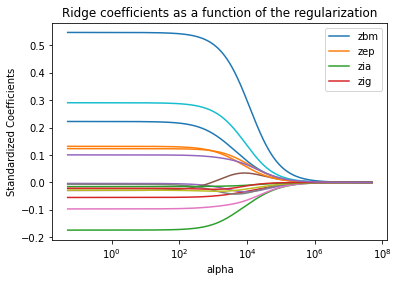

In [ ]:
X____ = df[['zbm', 'zep', 'zia', 'zig', 'zik', 'zlev', 'znoa',
       'zos', 'zroa', 'zsg', 'zsue', 'zshortintadj', 'zadv_sale', 'zlnSize', 'zsale_invcap']]
Y____ = df['yret']

alphas = 10**np.linspace(-1,8,1000)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X____), Y____)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(X____.columns[:4])

In [ ]:
ridge.set_params(alpha=10)
ridge.fit(scale(X____), Y____)

Ridge(alpha=10)

In [ ]:
r_co = pd.Series(ridge.coef_, index=X____.columns)
r_co

zbm             0.221747
zep             0.123211
zia            -0.173770
zig            -0.054808
zik            -0.003815
zlev           -0.028739
znoa           -0.096606
zos            -0.006862
zroa           -0.028299
zsg             0.290401
zsue            0.546769
zshortintadj    0.131532
zadv_sale      -0.015183
zlnSize        -0.021329
zsale_invcap    0.100394
dtype: float64

In [ ]:
r_co.sort_values(ascending=True)

zia            -0.173770
znoa           -0.096606
zig            -0.054808
zlev           -0.028739
zroa           -0.028299
zlnSize        -0.021329
zadv_sale      -0.015183
zos            -0.006862
zik            -0.003815
zsale_invcap    0.100394
zep             0.123211
zshortintadj    0.131532
zbm             0.221747
zsg             0.290401
zsue            0.546769
dtype: float64

In [ ]:
#To see if any correlation exists between variables
'''X = df[['price','shares', 'AC', 'AI', 'AG', 'BM', 'CI', 'CP', 'DP', 'EP', 'IA', 'IG',
       'IK', 'LEV', 'cum_return', 'cum_return_ltr', 'NOA', 'NS', 'OK', 'ROA',
       'ROE', 'SUE', 'permco_cap', 'SG', 'lnSize']]

corr= X.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', center=0)
plt.show()'''

"X = df[['price','shares', 'AC', 'AI', 'AG', 'BM', 'CI', 'CP', 'DP', 'EP', 'IA', 'IG',\n       'IK', 'LEV', 'cum_return', 'cum_return_ltr', 'NOA', 'NS', 'OK', 'ROA',\n       'ROE', 'SUE', 'permco_cap', 'SG', 'lnSize']]\n\ncorr= X.corr()\nfig, ax = plt.subplots(figsize=(20, 15))\nsns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', center=0)\nplt.show()"

## Out of Sample

In [ ]:
oos_df.head()

,LPERMNO,ind,year,price,yret,size,bm,ep,ia,ig,ik,lev,noa,os,roa,sg,sue,shortintadj,adv_sale,sale_invcap
30315,20626,36,2001,34.161667,-0.114000,5.670706e+07,0.405520,0.060911,0.074199,-0.044618,0.146790,0.743125,0.639868,-7.790671,0.059336,1.288268,-1.293983,5.049977e+06,0.000000,1.702000
30316,68347,35,2001,14.598333,-1.514667,2.760610e+08,0.472152,0.023256,0.042160,-0.043882,0.330224,0.499355,0.395828,-9.148309,0.021813,1.025453,-1.116419,2.022520e+07,0.009083,3.167333
30318,56741,24,2001,10.883333,2.696542,7.507500e+05,1.333608,0.013219,0.049523,-0.615794,0.097691,0.497827,0.721772,-7.974771,0.007573,0.813398,-1.580358,1.079412e+06,0.000000,2.977667
30320,38682,27,2001,28.510000,1.350742,6.564067e+06,0.445407,0.081088,0.031787,-0.140375,0.146309,0.814724,0.566375,-7.136360,0.069262,1.013549,-1.630949,6.511111e+05,0.000000,2.968417
30322,64194,80,2001,32.614167,0.662758,5.899000e+05,0.644103,0.062023,0.032055,-0.129936,0.259375,0.625563,0.690458,-6.677981,0.048858,0.952353,-1.114153,7.003383e+04,0.000000,1.586000


In [ ]:
oos_df.columns

Index(['LPERMNO', 'ind', 'year', 'price', 'yret', 'size', 'bm', 'ep', 'ia',
       'ig', 'ik', 'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj',
       'adv_sale', 'sale_invcap'],
      dtype='object')

In [ ]:
oos_df.set_index(["year"], inplace = True)
oos_df.dropna(inplace = True)
oos_df["lnSize"] = oos_df['size'].apply(np.log)
#oos_df["lnshortintadj"] = oos_df['shortintadj'].apply(np.log)

<ipython-input-263-86b1401d8441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oos_df.dropna(inplace = True)
<ipython-input-263-86b1401d8441>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oos_df["lnSize"] = oos_df['size'].apply(np.log)


In [ ]:
oos_df.columns

Index(['LPERMNO', 'ind', 'price', 'yret', 'size', 'bm', 'ep', 'ia', 'ig', 'ik',
       'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale',
       'sale_invcap', 'lnSize'],
      dtype='object')

In [ ]:
#removing outliers
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

#creating subset of our variables
out = oos_df.loc[:,['yret','bm', 'ep', 'ia', 'ig', 'ik', 'lev',
       'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale', 'lnSize', 'sale_invcap']]
out.index = out.index.get_level_values('year')
out.reset_index(inplace = True)

#applying out is_out function
outA = out.groupby('year').apply(is_out)
outA.drop('year',axis =1, inplace = True)
outA.apply(sum, axis = 0)

#creating boolean index
outB = outA.any(axis = 1)

#using boolean index
df = oos_df.reset_index()[~outB]

print(df.shape)

(6186, 21)


In [ ]:
df = df[(df['bm'] > 0) & (df['ep'] > 0) &(df['price'] > 5)& (df['size'] > 100000)]

In [ ]:
factors = ['bm','ep','sg','sue', 'shortintadj', 'ia', 'ig', 'noa', 'adv_sale', 'lev', 'sale_invcap']
zfactors = []
for i in factors:
    df['z'+ i] = df.groupby(['year', 'ind'])[i].transform(lambda x: (x - x.mean()) / x.std())
    zfactors.append('z'+i)

In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['year', 'LPERMNO', 'ind', 'price', 'yret', 'size', 'bm', 'ep', 'ia',
       'ig', 'ik', 'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj',
       'adv_sale', 'sale_invcap', 'lnSize', 'zbm', 'zep', 'zsg', 'zsue',
       'zshortintadj', 'zia', 'zig', 'znoa', 'zadv_sale', 'zlev',
       'zsale_invcap'],
      dtype='object')

In [ ]:
df['score'] = df['zbm'] * coef.loc['t stat','zbm']+ df['zep'] * coef.loc['t stat','zep']+ df['zsg'] * coef.loc['t stat','zsg']+ df['zsue'] * coef.loc['t stat','zsue']+ df['zshortintadj'] * coef.loc['t stat','zshortintadj']+ df['zia'] * coef.loc['t stat','zia']+ df['zig'] * coef.loc['t stat','zig']+ df['znoa'] * coef.loc['t stat','znoa']+ df['zadv_sale'] * coef.loc['t stat','zadv_sale']+ df['zlev'] * coef.loc['t stat','zlev'] + df['zsale_invcap'] * coef.loc['t stat','zsale_invcap']
df['rank'] = df.groupby('year')['score'].apply(lambda x: pd.qcut(x, 10, labels = False))

<ipython-input-270-13b6b3079baf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['zbm'] * coef.loc['t stat','zbm']+ df['zep'] * coef.loc['t stat','zep']+ df['zsg'] * coef.loc['t stat','zsg']+ df['zsue'] * coef.loc['t stat','zsue']+ df['zshortintadj'] * coef.loc['t stat','zshortintadj']+ df['zia'] * coef.loc['t stat','zia']+ df['zig'] * coef.loc['t stat','zig']+ df['znoa'] * coef.loc['t stat','znoa']+ df['zadv_sale'] * coef.loc['t stat','zadv_sale']+ df['zlev'] * coef.loc['t stat','zlev'] + df['zsale_invcap'] * coef.loc['t stat','zsale_invcap']
<ipython-input-270-13b6b3079baf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
long = df[df['rank']==9]
short = df[df['rank']==0]

short.reset_index(inplace = True)
long.reset_index(inplace = True)

In [ ]:
df.columns

Index(['year', 'LPERMNO', 'ind', 'price', 'yret', 'size', 'bm', 'ep', 'ia',
       'ig', 'ik', 'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj',
       'adv_sale', 'sale_invcap', 'lnSize', 'zbm', 'zep', 'zsg', 'zsue',
       'zshortintadj', 'zia', 'zig', 'znoa', 'zadv_sale', 'zlev',
       'zsale_invcap', 'score', 'rank'],
      dtype='object')

In [ ]:
li=[]
for i in range(2001, 2010):
  longRet = df[(df.LPERMNO.isin(long[long.year==i].LPERMNO))&(df.year == i+1)]
  longRet = longRet.groupby(['year']).yret.mean()
  longRet = longRet.reset_index()
  longRet.columns = ['year','long']

  shortRet = df[(df.LPERMNO.isin(short[short.year==i].LPERMNO))&(df.year==i+1)]
  shortRet = shortRet.groupby(['year']).yret.mean()
  shortRet = shortRet.reset_index()
  shortRet.columns = ['year','short']

  output = pd.merge(longRet, shortRet, left_on = ['year'], right_on =['year'] )
  li.append(output)

port = pd.concat(li, axis = 0, ignore_index = True)

port['LS'] = port['long']-port['short']
port

,year,long,short,LS
0,2002,-0.362524,-0.800250,0.437726
1,2003,2.545479,3.704929,-1.159450
2,2004,1.710171,1.739435,-0.029264
3,2005,1.275713,0.848743,0.426970
4,2006,1.213627,1.473917,-0.260290
5,2007,1.274642,0.613476,0.661166
6,2008,-3.441813,-2.068529,-1.373284
7,2009,2.690440,2.932446,-0.242006
8,2010,1.712000,2.218986,-0.506985


Out of Sample


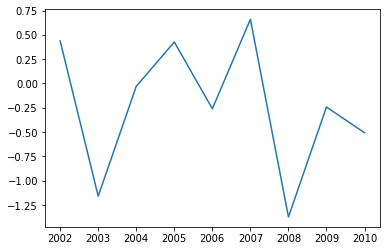

In [ ]:
# plotting a line graph
print("Out of Sample")
plt.plot(port["year"], port["LS"])
plt.show()

In [ ]:
print('Simple Mean')
print(port[['long', 'short', 'LS']].mean())
print('===================================')

import statistics
print('Geometric Mean')
gm_l, gm_s, gm_ls = port[['long', 'short', 'LS']].apply(lambda x: x+4).apply(statistics.geometric_mean).apply(lambda x: x-4)
print(gm_ls)
print('===================================')

print('Sharpe Ratio')
sr = gm_ls / port.LS.std()
print(sr)
print('===================================')

print('Annualized Sharpe Ratio')
print(sr * np.sqrt(12))
print('===================================')

Simple Mean
long     0.957526
short    1.184795
LS      -0.227269
dtype: float64
Geometric Mean
-0.28992668545434386
Sharpe Ratio
-0.41205105271286857
Annualized Sharpe Ratio
-1.42738671722186


### Run Portfolio Against Models (i) CAPM, (ii) Fama-French Three-Factor Model, and the (iii) Carhart Four-Factor Model

In [ ]:
f3 = pd.read_excel('/content/drive/Shareddrives/Group Project 736/FamaFrench3.xlsx')
mom = pd.read_excel('/content/drive/Shareddrives/Group Project 736/Momentum.xlsx')

data1 = f3.copy()

data1 = data1.rename(columns={"Mkt-RF": "Mkt"})

data1['date'] = pd.to_datetime(data1['Unnamed: 0'].astype(str), format='%Y%m')
data1['year'] = data1['date'].dt.strftime('%Y')
data1['month'] = data1['date'].dt.strftime('%m')
data1['year'] = data1['year'].astype('int')
data1['month'] = data1['month'].astype('int')

data2 = data1.groupby(['year']).agg({'Mkt': 'mean'})
data2 = data2.sort_values(by=['year']).reset_index()

data3 = data1.groupby(['year']).agg({'SMB': 'mean'})
data3 = data3.sort_values(by=['year']).reset_index()

data4 = data1.groupby(['year']).agg({'HML': 'mean'})
data4 = data4.sort_values(by=['year']).reset_index()

fama3 = pd.merge(pd.merge(data2,data3,on=['year']),data4,on=['year'])


data1 = mom.copy()

data1 = data1.rename(columns={"Mom   ": "Mom"})


data1['date'] = pd.to_datetime(data1['Unnamed: 0'].astype(str), format='%Y%m')
data1['year'] = data1['date'].dt.strftime('%Y')
data1['month'] = data1['date'].dt.strftime('%m')
data1['year'] = data1['year'].astype('int')
data1['month'] = data1['month'].astype('int')

data2 = data1.groupby(['year']).agg({'Mom': 'mean'})
data2 = data2.sort_values(by=['year']).reset_index()


fama4 = pd.merge(fama3, data2, left_on = ['year'], right_on =['year'] )
fama4.head()


,year,Mkt,SMB,HML,Mom
0,1927,2.180000,-0.110000,-0.213333,1.600833
1,1928,2.584167,0.321667,-0.365000,1.842500
2,1929,-1.349167,-3.305833,1.071667,2.571667
3,1930,-2.730000,-0.472500,-1.399167,2.805833
4,1931,-4.045000,0.625000,-1.336667,2.209167


In [ ]:
port = pd.merge(port, fama4, left_on = ['year'], right_on = ['year'], how='inner')
port.head()

,year,long,short,LS,Mkt,SMB,HML,Mom
0,2002,-0.362524,-0.800250,0.437726,-1.939167,0.465000,0.828333,2.356667
1,2003,2.545479,3.704929,-1.159450,2.291667,1.635000,0.294167,-1.500000
2,2004,1.710171,1.739435,-0.029264,0.870833,0.387500,0.560833,0.025000
3,2005,1.275713,0.848743,0.426970,0.275000,-0.129167,0.715000,1.161667
4,2006,1.213627,1.473917,-0.260290,0.825833,0.056667,0.845000,-0.539167


In [ ]:
print('CAPM Factor')
import statsmodels.formula.api as sm
CAPM = sm.ols(formula = 'LS ~ Mkt', data = port).fit()
print(CAPM.summary())
print('===================================')

print('FF3 Factor')
import statsmodels.formula.api as sm
FF3 = sm.ols(formula = 'LS ~ Mkt + SMB + HML', data = port).fit()
print(FF3.summary())
print('===================================')

print('C4 Factor')
C4 = sm.ols(formula = 'LS ~ Mkt + SMB + HML + Mom', data = port).fit()
print(C4.summary())
print('===================================')

CAPM Factor
                            OLS Regression Results                            
Dep. Variable:                     LS   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.137
Method:                 Least Squares   F-statistic:                   0.03438
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.858
Time:                        18:41:29   Log-Likelihood:                -9.0547
No. Observations:                   9   AIC:                             22.11
Df Residuals:                       7   BIC:                             22.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2343      0.253     -0.

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Valid Sample

In [ ]:
valid_df.head()

,LPERMNO,ind,year,price,yret,size,bm,ep,ia,ig,ik,lev,noa,os,roa,sg,sue,shortintadj,adv_sale,sale_invcap
41745,28118,12,2011,93.081667,-0.467325,7.207012e+05,0.612893,0.108907,0.044267,-0.214925,0.097263,1.658812,0.387586,-7.869765,0.053402,0.870609,0.101026,1.777878e+05,0.006083,2.664917
41746,50623,38,2011,40.006250,1.452617,1.399027e+06,0.300308,0.032403,0.030198,0.149329,0.198675,0.314500,0.335279,-8.084938,0.048011,1.152229,1.022442,5.681592e+05,0.000000,2.258417
41747,44206,49,2011,34.597500,1.331275,3.553418e+07,0.979366,0.069018,0.059421,0.051012,0.099760,1.905503,0.638327,-7.361114,0.027597,0.919026,0.676739,4.302805e+06,0.000000,0.548833
41748,44274,16,2011,20.470000,-3.451367,7.917428e+06,0.613350,0.058210,0.050128,0.687869,0.229603,0.303708,0.689603,-7.870946,0.070194,1.140187,-0.761624,4.326489e+06,0.000000,1.293500
41750,20204,34,2011,45.971667,1.697325,6.131093e+06,0.430673,0.064226,0.016531,-0.257991,0.074918,0.717272,0.409792,-8.326564,0.056829,1.077234,0.402018,4.627601e+05,0.000000,1.650917


In [ ]:
valid_df.set_index(["year"], inplace = True)
valid_df.dropna(inplace = True)
valid_df["lnSize"] = valid_df['size'].apply(np.log)

<ipython-input-280-01da5f1b98fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.dropna(inplace = True)
<ipython-input-280-01da5f1b98fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["lnSize"] = valid_df['size'].apply(np.log)


In [ ]:
valid_df.columns

Index(['LPERMNO', 'ind', 'price', 'yret', 'size', 'bm', 'ep', 'ia', 'ig', 'ik',
       'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale',
       'sale_invcap', 'lnSize'],
      dtype='object')

In [ ]:
#removing outliers
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

#creating subset of our variables
out = valid_df.loc[:,['yret','bm', 'ep', 'ia', 'ig', 'ik',
       'lev', 'noa', 'os', 'roa', 'sg', 'sue', 'shortintadj', 'adv_sale',
       'lnSize', 'sale_invcap']]
out.index = out.index.get_level_values('year')
out.reset_index(inplace = True)

#applying out is_out function
outA = out.groupby('year').apply(is_out)
outA.drop('year',axis =1, inplace = True)
outA.apply(sum, axis = 0)

#creating boolean index
outB = outA.any(axis = 1)

#using boolean index
df = valid_df.reset_index()[~outB]

print(df.shape)

(3315, 21)


In [ ]:
df = df[(df['bm'] > 0) & (df['ep'] > 0) & (df['price'] > 5) & (df['size'] > 100000)]

In [ ]:
factors = ['bm','ep','sg','sue', 'shortintadj', 'ia', 'ig', 'noa', 'adv_sale', 'lev', 'sale_invcap']
zfactors = []
for i in factors:
    df['z'+ i] = df.groupby(['year', 'ind'])[i].transform(lambda x: (x - x.mean()) / x.std())
    zfactors.append('z'+i)

In [ ]:
df = df.dropna()

In [ ]:
df['score'] = df['zbm'] * coef.loc['t stat','zbm']+ df['zep'] * coef.loc['t stat','zep']+ df['zsg'] * coef.loc['t stat','zsg']+ df['zsue'] * coef.loc['t stat','zsue']+ df['zshortintadj'] * coef.loc['t stat','zshortintadj']+ df['zia'] * coef.loc['t stat','zia']+ df['zig'] * coef.loc['t stat','zig']+ df['znoa'] * coef.loc['t stat','znoa']+ df['zadv_sale'] * coef.loc['t stat','zadv_sale']+ df['zlev'] * coef.loc['t stat','zlev'] + df['zsale_invcap'] * coef.loc['t stat','zsale_invcap']
df['rank'] = df.groupby('year')['score'].apply(lambda x: pd.qcut(x, 10, labels = False))

<ipython-input-286-13b6b3079baf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['zbm'] * coef.loc['t stat','zbm']+ df['zep'] * coef.loc['t stat','zep']+ df['zsg'] * coef.loc['t stat','zsg']+ df['zsue'] * coef.loc['t stat','zsue']+ df['zshortintadj'] * coef.loc['t stat','zshortintadj']+ df['zia'] * coef.loc['t stat','zia']+ df['zig'] * coef.loc['t stat','zig']+ df['znoa'] * coef.loc['t stat','znoa']+ df['zadv_sale'] * coef.loc['t stat','zadv_sale']+ df['zlev'] * coef.loc['t stat','zlev'] + df['zsale_invcap'] * coef.loc['t stat','zsale_invcap']
<ipython-input-286-13b6b3079baf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
long = df[df['rank']==9]
short = df[df['rank']==0]

short.reset_index(inplace = True)
long.reset_index(inplace = True)

In [ ]:
li=[]
for i in range(2011, 2017):
  longRet = df[(df.LPERMNO.isin(long[long.year==i].LPERMNO))&(df.year == i+1)]
  longRet = longRet.groupby(['year']).yret.mean()
  longRet = longRet.reset_index()
  longRet.columns = ['year','long']

  shortRet = df[(df.LPERMNO.isin(short[short.year==i].LPERMNO))&(df.year==i+1)]
  shortRet = shortRet.groupby(['year']).yret.mean()
  shortRet = shortRet.reset_index()
  shortRet.columns = ['year','short']

  output = pd.merge(longRet, shortRet, left_on = ['year'], right_on =['year'] )
  li.append(output)

port = pd.concat(li, axis = 0, ignore_index = True)

port['LS'] = port['long']-port['short']
port

,year,long,short,LS
0,2012,1.320547,1.258229,0.062319
1,2013,2.687824,2.864721,-0.176897
2,2014,0.251344,0.238747,0.012597
3,2015,-0.020154,-1.283400,1.263246
4,2016,1.407045,2.366080,-0.959035
5,2017,1.634340,1.509753,0.124587


Valid Sample


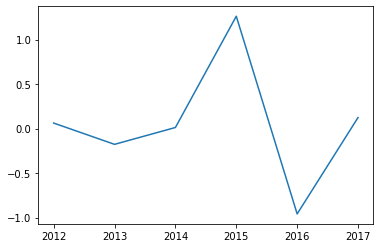

In [ ]:
# plotting a line graph
print("Valid Sample")
plt.plot(port["year"], port["LS"])
plt.show()

In [ ]:
print('Simple Mean')
print(port[['long', 'short', 'LS']].mean())
print('===================================')

import statistics
print('Geometric Mean')
gm_l, gm_s, gm_ls = port[['long', 'short', 'LS']].apply(lambda x: x+4).apply(statistics.geometric_mean).apply(lambda x: x-4)
print(gm_ls)
print('===================================')

print('Sharpe Ratio')
sr = gm_ls / port.LS.std()
print(sr)
print('===================================')

print('Annualized Sharpe Ratio')
print(sr * np.sqrt(12))
print('===================================')

Simple Mean
long     1.213491
short    1.159022
LS       0.054469
dtype: float64
Geometric Mean
0.0029193574114794174
Sharpe Ratio
0.004089044840152056
Annualized Sharpe Ratio
0.014164866835141437


### Run Portfolio Against Models (i) CAPM, (ii) Fama-French Three-Factor Model, and the (iii) Carhart Four-Factor Model

In [ ]:
fama4.head()

,year,Mkt,SMB,HML,Mom
0,1927,2.180000,-0.110000,-0.213333,1.600833
1,1928,2.584167,0.321667,-0.365000,1.842500
2,1929,-1.349167,-3.305833,1.071667,2.571667
3,1930,-2.730000,-0.472500,-1.399167,2.805833
4,1931,-4.045000,0.625000,-1.336667,2.209167


In [ ]:
port = pd.merge(port, fama4, left_on = ['year'], right_on = ['year'], how='inner')
port.head()

,year,long,short,LS,Mkt,SMB,HML,Mom
0,2012,1.320547,1.258229,0.062319,1.308333,-0.078333,0.710000,-0.035000
1,2013,2.687824,2.864721,-0.176897,2.572500,0.490833,0.183333,0.460000
2,2014,0.251344,0.238747,0.012597,0.956667,-0.546667,-0.125000,0.092500
3,2015,-0.020154,-1.283400,1.263246,0.074167,-0.308333,-0.850833,1.732500
4,2016,1.407045,2.366080,-0.959035,1.091667,0.534167,1.612500,-1.611667


In [ ]:
print('CAPM Factor')
import statsmodels.formula.api as sm
CAPM = sm.ols(formula = 'LS ~ Mkt', data = port).fit()
print(CAPM.summary())
print('===================================')

print('FF3 Factor')
import statsmodels.formula.api as sm
FF3 = sm.ols(formula = 'LS ~ Mkt + SMB + HML', data = port).fit()
print(FF3.summary())
print('===================================')

print('C4 Factor')
C4 = sm.ols(formula = 'LS ~ Mkt + SMB + HML + Mom', data = port).fit()
print(C4.summary())
print('===================================')

CAPM Factor
                            OLS Regression Results                            
Dep. Variable:                     LS   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1.480
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.291
Time:                        18:41:32   Log-Likelihood:                -5.0004
No. Observations:                   6   AIC:                             14.00
Df Residuals:                       4   BIC:                             13.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6280      0.547      1.

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
